1. Build a strategy to shortlist  customers who can be offered a fresh loan. Also recommend for what purpose(s) the offer holds (refer attribute 4 for a list of purposes for the loan). <br>
2. Explain your process in terms of how you are managing the underlying risk.
Note that the event variable, which is the last variable in the data, is 1 for ‘good’ accounts and 2 for ‘bad’ accounts. Similarly, the details of each attribute may be found in the following website: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [574]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [575]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',delim_whitespace=True, header=None)

In [576]:
df.columns = ['existing_checkout', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_acc', 'emp_duration', 'installment_rate', 'sex_status', 'other_debtors', 'residence_since', 'property', 'age', 'installment_plan', 'housing', 'existing_credits', 'job', 'liabilities', 'telephone', 'foreign_worker', 'yvar']

In [577]:
df

,existing_checkout,duration,credit_history,purpose,credit_amount,savings_acc,emp_duration,installment_rate,sex_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,liabilities,telephone,foreign_worker,yvar
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


#Attribute Information
#Additional Information

Attribute 1:  (qualitative)      

 Status of existing checking account

             A11 :      ... <    0 DM

	       A12 : 0 <= ... <  200 DM

	       A13 :      ... >= 200 DM / salary assignments for at least 1 year

               A14 : no checking account


Attribute 2:  (numerical)

	      Duration in month


Attribute 3:  (qualitative)

	      Credit history

	      A30 : no credits taken/ all credits paid back duly

              A31 : all credits at this bank paid back duly

	      A32 : existing credits paid back duly till now

              A33 : delay in paying off in the past

	      A34 : critical account/  other credits existing (not at this bank)



Attribute 4:  (qualitative)

	      Purpose

	      A40 : car (new)

	      A41 : car (used)

	      A42 : furniture/equipment

	      A43 : radio/television

	      A44 : domestic appliances

	      A45 : repairs

	      A46 : education

	      A47 : (vacation - does not exist?)

	      A48 : retraining

	      A49 : business

	      A410 : others

Attribute 5:  (numerical)

	      Credit amount



Attibute 6:  (qualitative)

	      Savings account/bonds

	      A61 :          ... <  100 DM

	      A62 :   100 <= ... <  500 DM

	      A63 :   500 <= ... < 1000 DM

	      A64 :          .. >= 1000 DM

              A65 :   unknown/ no savings account



Attribute 7:  (qualitative)

	      Present employment since

	      A71 : unemployed

	      A72 :       ... < 1 year


	      A73 : 1  <= ... < 4 years  

	      A74 : 4  <= ... < 7 years

	      A75 :       .. >= 7 years


Attribute 8:  (numerical)

	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)

	      Personal status and sex

	      A91 : male   : divorced/separated

	      A92 : female : divorced/separated/married

              A93 : male   : single

	      A94 : male   : married/widowed

	      A95 : female : single


Attribute 10: (qualitative)

	      Other debtors / guarantors

	      A101 : none

	      A102 : co-applicant

	      A103 : guarantor



Attribute 11: (numerical)

	      Present residence since

Attribute 12: (qualitative)

	      Property

	      A121 : real estate

	      A122 : if not A121 : building society savings agreement/ life insurance

              A123 : if not A121/A122 : car or other, not in attribute 6

	      A124 : unknown / no property



Attribute 13: (numerical)

	      Age in years

Attribute 14: (qualitative)

	      Other installment plans

	      A141 : bank

	      A142 : stores

	      A143 : none

Attribute 15: (qualitative)

	      Housing

	      A151 : rent

	      A152 : own

	      A153 : for free


Attribute 16: (numerical)

              Number of existing credits at this bank



Attribute 17: (qualitative)


	      Job
	      A171 : unemployed/ unskilled  - non-resident

	      A172 : unskilled - resident

	      A173 : skilled employee / official

	      A174 : management/ self-employed/
		     highly qualified employee/ officer


Attribute 18: (numerical)

	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)

	      Telephone

	      A191 : none

	      A192 : yes, registered under the customers name



Attribute 20: (qualitative)

	      foreign worker

	      A201 : yes

	      A202 : no
        

In [578]:
df.dtypes

existing_checkout    object
duration              int64
credit_history       object
purpose              object
credit_amount         int64
savings_acc          object
emp_duration         object
installment_rate      int64
sex_status           object
other_debtors        object
residence_since       int64
property             object
age                   int64
installment_plan     object
housing              object
existing_credits      int64
job                  object
liabilities           int64
telephone            object
foreign_worker       object
yvar                  int64
dtype: object

In [579]:
#Viewing data
df.head(10)

,existing_checkout,duration,credit_history,purpose,credit_amount,savings_acc,emp_duration,installment_rate,sex_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,liabilities,telephone,foreign_worker,yvar
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [580]:
# Continuous Variable Summary
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,liabilities,yvar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [581]:
#Checking Null values
df.isnull().sum()

existing_checkout    0
duration             0
credit_history       0
purpose              0
credit_amount        0
savings_acc          0
emp_duration         0
installment_rate     0
sex_status           0
other_debtors        0
residence_since      0
property             0
age                  0
installment_plan     0
housing              0
existing_credits     0
job                  0
liabilities          0
telephone            0
foreign_worker       0
yvar                 0
dtype: int64

<Axes: >

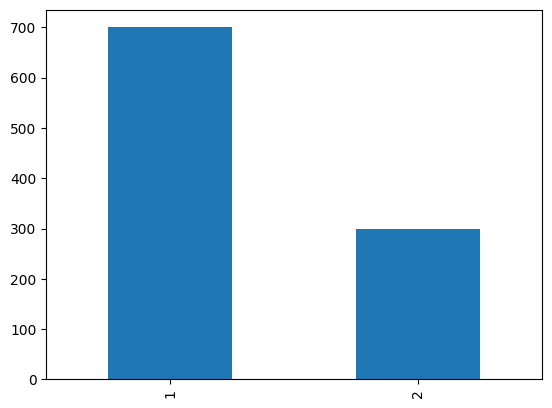

In [582]:
#Univariate Plots for Categorical Variables
df['yvar'].value_counts().plot.bar()


#Data Visualization

<Figure size 640x480 with 0 Axes>

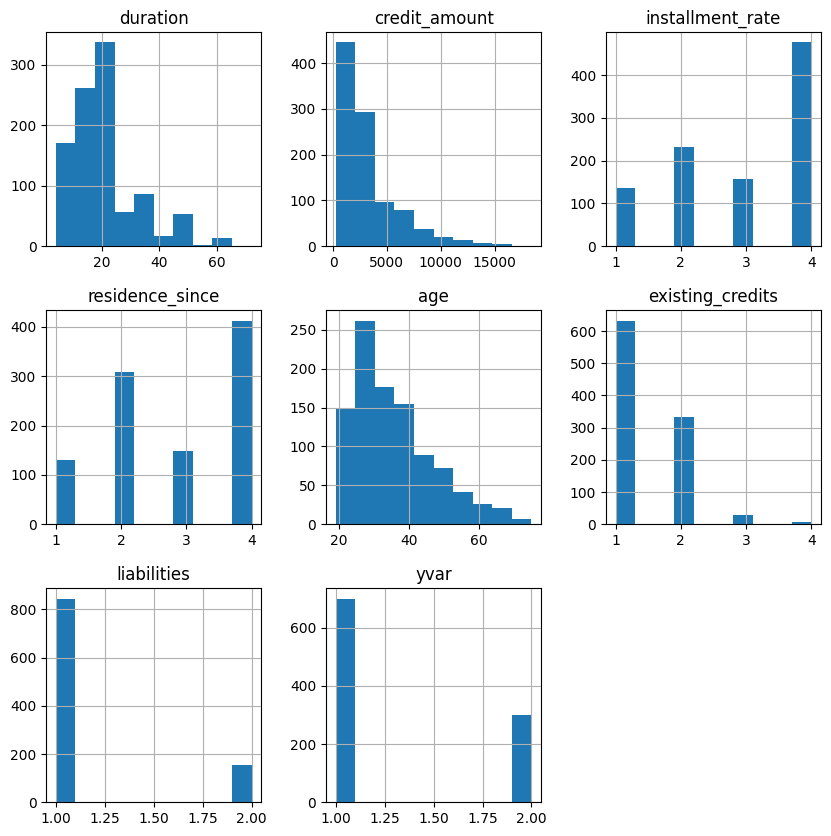

<Figure size 640x480 with 0 Axes>

In [583]:
#Histogram Plot
df.hist(figsize=(10,10))
plt.figure()

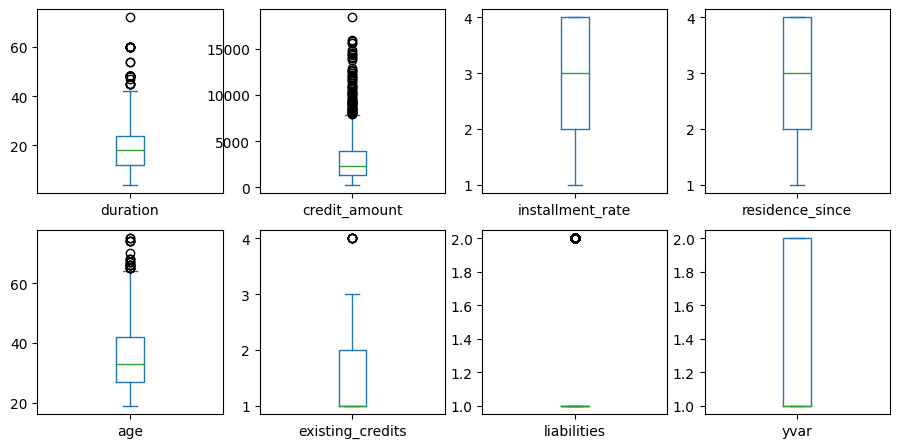

In [584]:
df.plot(kind='box', subplots=True , layout=(4,4), figsize=(11,11) , sharex=False, sharey=False)
plt.show()

In [585]:
#Remove the outliers
df.loc[df['duration']> df['duration'].quantile(0.90),['duration']]= df['duration'].quantile(0.95)
df.loc[df['credit_amount']> df['credit_amount'].quantile(0.95),['credit_amount']]= df['credit_amount'].quantile(0.95)
df.loc[df['age']> df['age'].quantile(0.95),['age']]= df['age'].quantile(0.95)
df.loc[df['liabilities']> df['liabilities'].quantile(0.90),['liabilities']]= df['liabilities'].quantile(0.90)

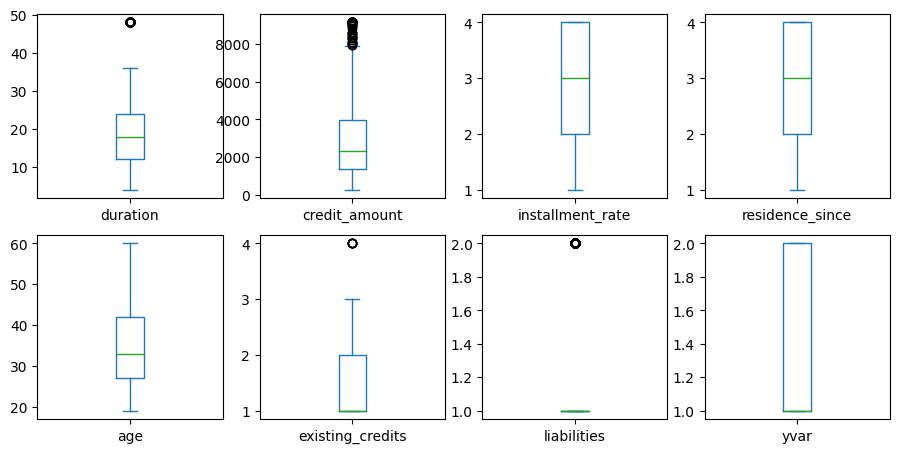

In [586]:
df.plot(kind='box', subplots=True , layout=(4,4), figsize=(11,11) , sharex=False, sharey=False)
plt.show()

In [587]:
df.dtypes

existing_checkout     object
duration               int64
credit_history        object
purpose               object
credit_amount        float64
savings_acc           object
emp_duration          object
installment_rate       int64
sex_status            object
other_debtors         object
residence_since        int64
property              object
age                    int64
installment_plan      object
housing               object
existing_credits       int64
job                   object
liabilities            int64
telephone             object
foreign_worker        object
yvar                   int64
dtype: object

#Checking relationship between two categorical variable

In [588]:
data = df.copy()
from sklearn import preprocessing

cats = ['existing_checkout', 'credit_history', 'purpose','savings_acc', 'emp_duration', 'sex_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone','foreign_worker']
# for i in cats:
#     label_encoder = preprocessing.LabelEncoder()
#     data[i] = label_encoder.fit_transform(df[i])
# data.head()

In [589]:
from scipy.stats import chi2_contingency
for i in cats:
    data_crosstab = pd.crosstab(df['yvar'], df[i], margins= False)
    print(data_crosstab, '\n')
    stat, p, dof, expected = chi2_contingency(data_crosstab)
    # data_crosstab[:-1].plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
    # print(data_crosstab)
    alpha = 0.025
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0) \n\n\n')
    else:
        print('Independent (H0 holds true) \n\n\n')

existing_checkout  A11  A12  A13  A14
yvar                                 
1                  139  164   49  348
2                  135  105   14   46 

p value is 1.2189020722893755e-26
Dependent (reject H0) 



credit_history  A30  A31  A32  A33  A34
yvar                                   
1                15   21  361   60  243
2                25   28  169   28   50 

p value is 1.2791872956751013e-12
Dependent (reject H0) 



purpose  A40  A41  A410  A42  A43  A44  A45  A46  A48  A49
yvar                                                      
1        145   86     7  123  218    8   14   28    8   63
2         89   17     5   58   62    4    8   22    1   34 

p value is 0.00011574910079691586
Dependent (reject H0) 



savings_acc  A61  A62  A63  A64  A65
yvar                                
1            386   69   52   42  151
2            217   34   11    6   32 

p value is 2.7612142385682596e-07
Dependent (reject H0) 



emp_duration  A71  A72  A73  A74  A75
yvar              

#Categorical-Continuous combination

In [590]:
df.dtypes

existing_checkout     object
duration               int64
credit_history        object
purpose               object
credit_amount        float64
savings_acc           object
emp_duration          object
installment_rate       int64
sex_status            object
other_debtors         object
residence_since        int64
property              object
age                    int64
installment_plan      object
housing               object
existing_credits       int64
job                   object
liabilities            int64
telephone             object
foreign_worker        object
yvar                   int64
dtype: object

In [591]:
data = df.copy()

numerical= ['duration','credit_amount','installment_rate','residence_since','age','existing_credits']

In [592]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

p value is 2.4501840973224e-289
Dependent (reject H0) 



p value is 4.768241214186943e-221
Dependent (reject H0) 



p value is 1.509995199934289e-259
Dependent (reject H0) 



p value is 1.6713478650503652e-237
Dependent (reject H0) 



p value is 0.0
Dependent (reject H0) 



p value is 4.766807588521864e-06
Dependent (reject H0) 





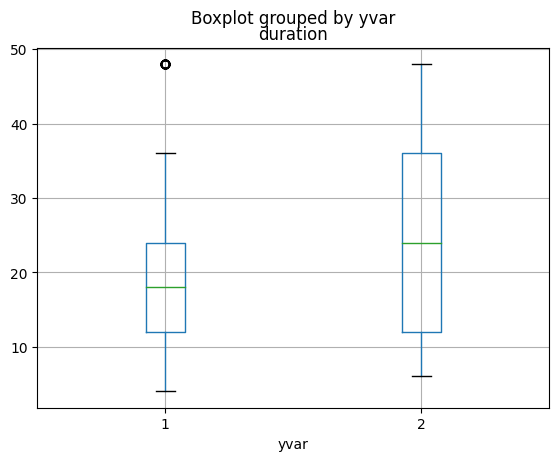

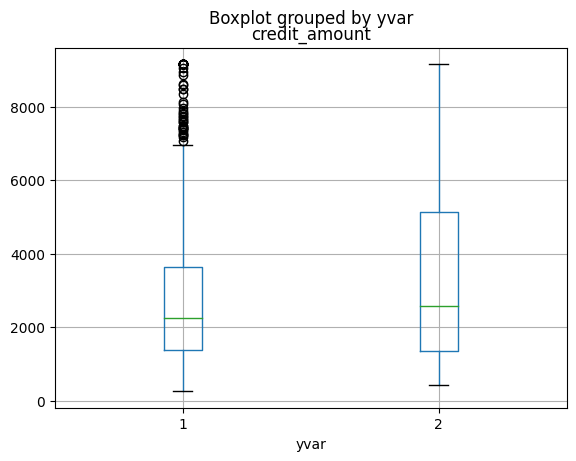

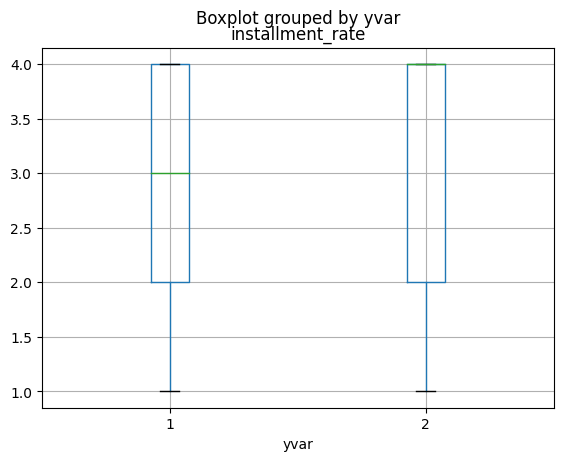

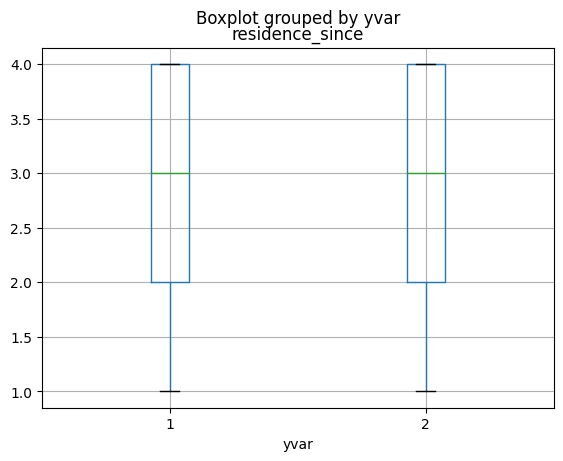

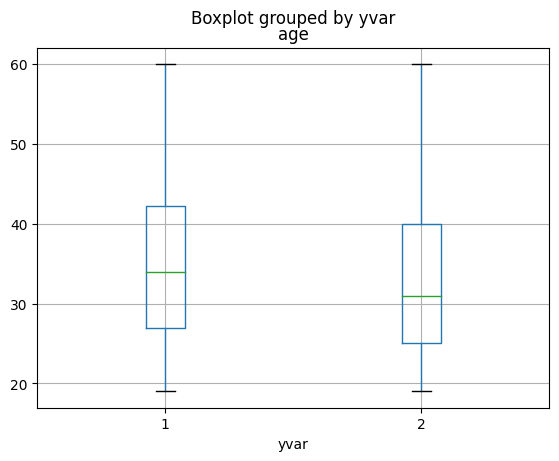

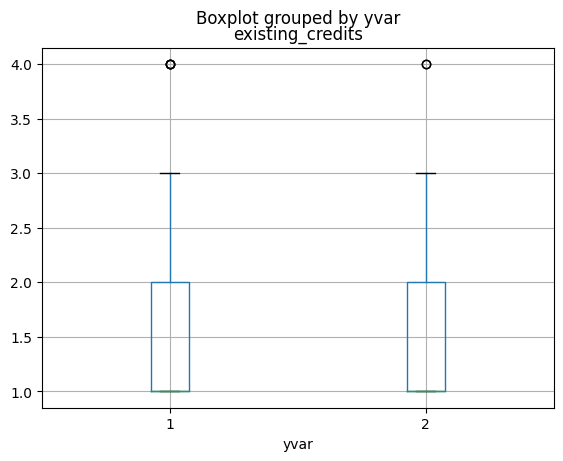

In [593]:

for i in numerical:
    df.boxplot(column= i , by= 'yvar')
    t_statistic, p_value = ttest_ind(df[i], df['yvar'], equal_var = False)
    # print(t_statistic)
    # print (p_value)

    alpha = 0.025
    print("p value is " + str(p_value))
    if p_value <= alpha:
        print('Dependent (reject H0) \n\n\n')
    else:
        print('Independent (H0 holds true) \n\n\n')

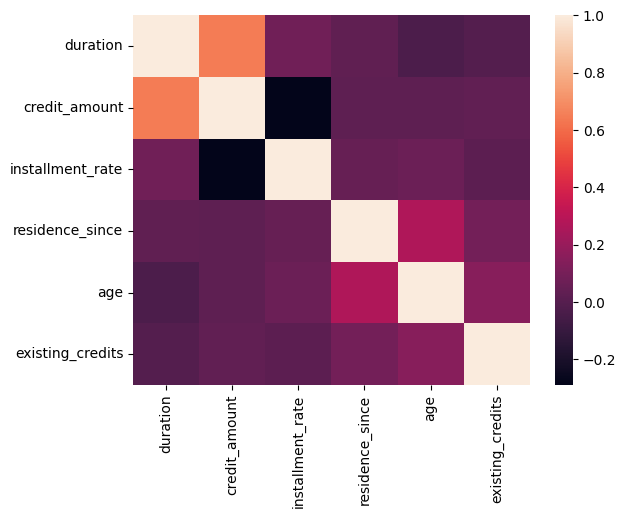

In [594]:
# Correlation plts
import numpy
import seaborn
# Multivariate Plots (Continuous Vs Continuous)
dataset1 = df[numerical]
names= [numerical]
correlations = dataset1.corr()
seaborn.heatmap(correlations)
plt.show()

In [595]:
correlations

,duration,credit_amount,installment_rate,residence_since,age,existing_credits
duration,1.000000,0.643752,0.081608,0.032409,-0.029989,-0.005488
credit_amount,0.643752,1.000000,-0.289367,0.027520,0.026316,0.035561
installment_rate,0.081608,-0.289367,1.000000,0.049302,0.067861,0.021669
residence_since,0.032409,0.027520,0.049302,1.000000,0.267845,0.089625
age,-0.029989,0.026316,0.067861,0.267845,1.000000,0.150333
existing_credits,-0.005488,0.035561,0.021669,0.089625,0.150333,1.000000


In [596]:
credit_ml_df = df.copy() # making a copy of the dataframe for feature engineering and transformation

In [597]:
credit_ml_df['yvar'] = credit_ml_df['yvar'].replace({1: 0, 2: 1})


In [598]:
age_interval = (18, 25, 35, 60, 120)
age_cat = ['Student', 'Young', 'Adult', 'Senior'] # creating a new category for age
credit_ml_df["Age Category"] = pd.cut(credit_ml_df.age, age_interval, labels=age_cat)

credit_interval = (0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000)
credit_cat = ['x < 2500', '2500 <= x < 5000',
              '5000 <= x < 7500', '7500 <= x < 10000',
              '10000 <= x < 12500', '12500 <= x < 15000', '15000 <= x < 17500', 'greater than 17500'] # creating a new category for credit amount
credit_ml_df['Credit Category'] = pd.cut(credit_ml_df['credit_amount'], credit_interval, labels=credit_cat)
credit_ml_df.head()

,existing_checkout,duration,credit_history,purpose,credit_amount,savings_acc,emp_duration,installment_rate,sex_status,other_debtors,...,installment_plan,housing,existing_credits,job,liabilities,telephone,foreign_worker,yvar,Age Category,Credit Category
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A143,A152,2,A173,1,A192,A201,0,Adult,x < 2500
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A143,A152,1,A173,1,A191,A201,1,Student,5000 <= x < 7500
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,...,A143,A152,1,A172,2,A191,A201,0,Adult,x < 2500
3,A11,48,A32,A42,7882.0,A61,A74,2,A93,A103,...,A143,A153,1,A173,2,A191,A201,0,Adult,7500 <= x < 10000
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A143,A153,2,A173,2,A191,A201,1,Adult,2500 <= x < 5000


In [599]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(credit_ml_df['Credit Category'], credit_ml_df['Age Category']).style.background_gradient(cmap=cm)

Age Category,Student,Young,Adult
Credit Category,,,
x < 2500,114,199,224
2500 <= x < 5000,48,127,100
5000 <= x < 7500,14,40,48
7500 <= x < 10000,14,32,40


In [600]:
# plt.figure(figsize=(10, 6))
# plt.title("Credit Amount by Age Category", fontsize=20)
# sns.stripplot(data=credit_ml_df, x='Age Category', y='credit_amount') # create strip plot to detect outliers
# plt.show()

In [601]:
# credit_cat = credit_ml_df.groupby('Credit Category')
# pd.concat([group for (name, group) in credit_cat if name in ['greater than 17500', '15000 <= x < 17500']])

In [602]:
# credit_cat = credit_ml_df.groupby('Credit Category')
# credit_cat.get_group('greater than 17500')

In [603]:
# credit_ml_df = credit_ml_df.drop([915], axis=0) # drop the outlier from the dataframe
# pd.crosstab(credit_ml_df['Credit Category'], credit_ml_df['Age Category']).style.background_gradient(cmap=cm)

In [604]:
from sklearn.model_selection import train_test_split

target = credit_ml_df['yvar'] # assign the 'yvar' column to a seperate variable
credit_ml_df['credit_amount'] = np.log(credit_ml_df['credit_amount']) # taking the natural log of the credit variable
credit_ml_df = credit_ml_df.drop(['yvar'], axis=1) # drop the target variable from the dataframe

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(credit_ml_df, target, train_size=0.8, random_state=42)
print("Length of training data:", len(X_train))
print("Length of testing data:", len(X_test))
print("Length of total data:", len(credit_ml_df))

Length of training data: 800
Length of testing data: 200
Length of total data: 1000


In [605]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])
# num_attributes = ['age', 'credit_amount', 'duration']
num_attributes = ['age','duration','installment_rate','residence_since','existing_credits','credit_amount']
cat_attributes = ['existing_checkout', 'credit_history', 'purpose','savings_acc', 'emp_duration', 'sex_status', 'property', 'installment_plan', 'housing','foreign_worker']
# cat_attributes = ['sex_status','job', 'housing', 'savings_acc', 'existing_checkout', 'purpose', 'Age Category', 'Credit Category']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])

train_data_prepared = full_pipeline.fit_transform(X_train)
test_data_prepared = full_pipeline.fit_transform(X_test)

In [606]:
from sklearn.metrics import confusion_matrix

y_train_predicitons = y_train
confusion_matrix(y_train, y_train_predicitons)

array([[559,   0],
       [  0, 241]])

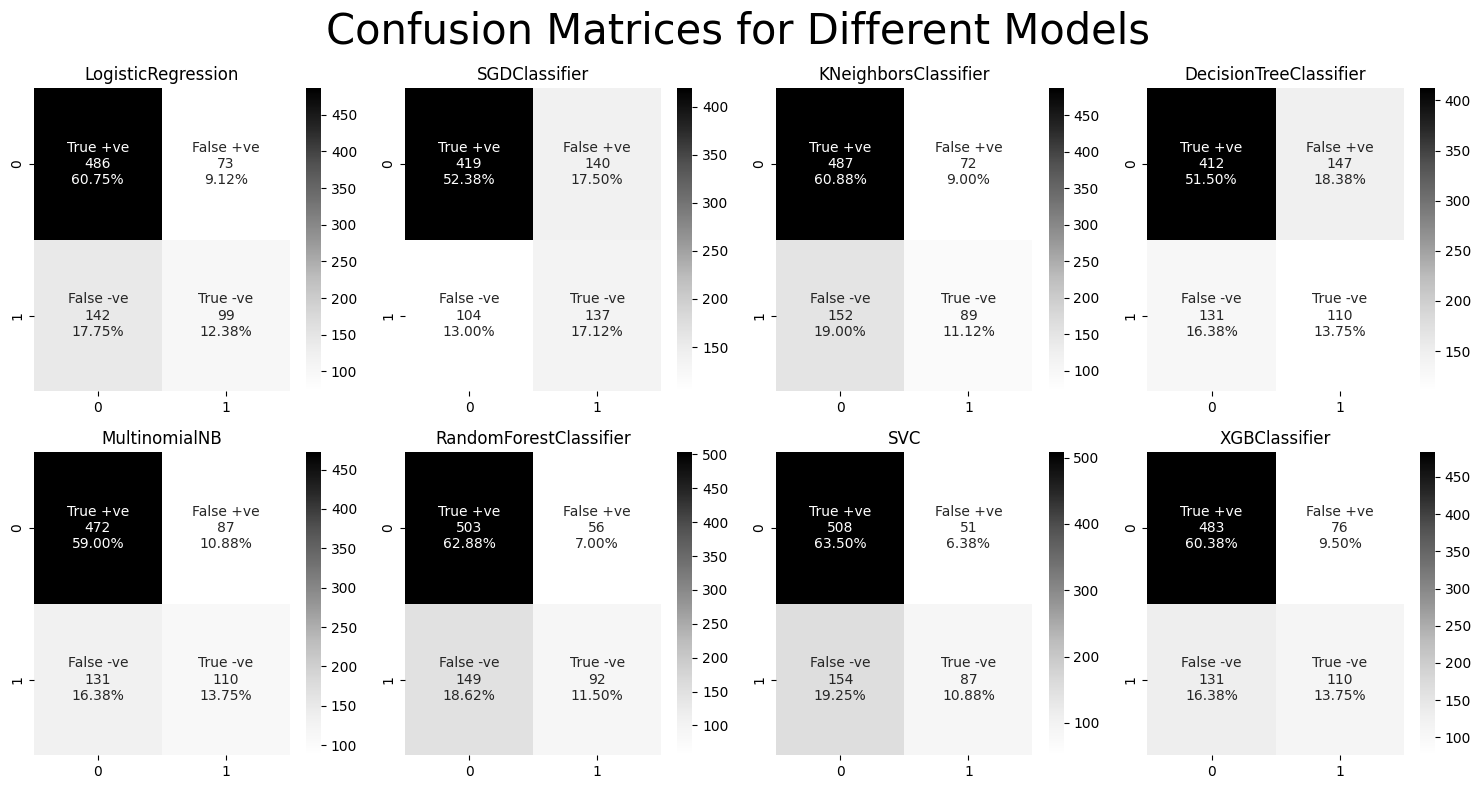

In [607]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix

clf_lr = LogisticRegression(random_state=42)
clf_sgd = SGDClassifier(random_state=42)
clf_knn = KNeighborsClassifier()
clf_cart = DecisionTreeClassifier(random_state=42)
clf_nb = MultinomialNB()
clf_rf = RandomForestClassifier(random_state=42)
clf_svm = SVC(random_state=42)
clf_xgb = XGBClassifier()

# to feed the random state
seed = 7

# prepare models
models = []
models.append((clf_lr))
models.append((clf_sgd))
models.append((clf_knn))
models.append((clf_cart))
models.append((clf_nb))
models.append((clf_rf))
models.append((clf_svm))
models.append((clf_xgb))

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for model, ax in zip(models, axes.flatten()):
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True) # use kfold cross validation for training
    y_train_pred = cross_val_predict(model, train_data_prepared, y_train, cv=kfold) # cross_val_predict will train the model and give y-values
    cf_matrix = confusion_matrix(y_train, y_train_pred)

    group_names = ['True +ve', 'False +ve', 'False -ve', 'True -ve']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys', ax=ax) # visual confusion matrix of all models
    ax.title.set_text(type(model).__name__)

#plt.title("Confusion Matrices")
fig.suptitle("Confusion Matrices for Different Models ", fontsize=30)
plt.tight_layout()
plt.show()

#CONCUSION :-

TRUE POSITIVE - ACTUAL - GOOD(0) , PREDICTED - GOOD(0)

TRUE NEGATIVE - ACTUAL - BAD(1) , PREDICTED - BAD(1)

FALSE POSITIVE - ACTUAL - BAD(1) , PREDICTED - GOOD(0)

FALSE NEGATIVE - ACTUAL - GOOD(0) , PREDICTED - BAD(1)

In [608]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', clf_lr))
models.append(('SGD', clf_sgd))
models.append(('KNN', clf_knn))
models.append(('CART', clf_cart))
models.append(('NB', clf_nb))
models.append(('RF', clf_rf))
models.append(('SVM', clf_svm))
models.append(('XGB', clf_xgb))

# evaluate each model in turn
results = []
names = []
scoring = 'f1'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, train_data_prepared, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.480578 (0.101148)
SGD: 0.510933 (0.103477)
KNN: 0.436600 (0.082242)
CART: 0.442371 (0.111121)
NB: 0.503404 (0.079105)
RF: 0.468993 (0.089147)
SVM: 0.462303 (0.074554)
XGB: 0.514269 (0.105868)


In [609]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', clf_lr))
models.append(('SGD', clf_sgd))
models.append(('KNN', clf_knn))
models.append(('CART', clf_cart))
models.append(('NB', clf_nb))
models.append(('RF', clf_rf))
models.append(('SVM', clf_svm))
models.append(('XGB', clf_xgb))

# evaluate each model in turn
# creating a list for the kfold CV metric scores
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

# creating a list of the average metric scores
avg_accuracy_results = []
avg_precision_results = []
avg_recall_results = []
avg_f1_results = []

names = []

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_accuracy = cross_val_score(model, train_data_prepared, y_train, cv=kfold, scoring='accuracy')
        cv_precision = cross_val_score(model, train_data_prepared, y_train, cv=kfold, scoring='precision')
        cv_recall = cross_val_score(model, train_data_prepared, y_train, cv=kfold, scoring='recall')
        cv_f1 = cross_val_score(model, train_data_prepared, y_train, cv=kfold, scoring='f1')
        accuracy_results.append(cv_accuracy)
        precision_results.append(cv_precision)
        recall_results.append(cv_recall)
        f1_results.append(cv_f1)

        avg_accuracy_results.append(cv_accuracy.mean())
        avg_precision_results.append(cv_precision.mean())
        avg_recall_results.append(cv_recall.mean())
        avg_f1_results.append(cv_f1.mean())

        names.append(name)

clf_metrics_data = {
    "Accuracy": avg_accuracy_results,
    "Precision": avg_precision_results,
    "Recall": avg_recall_results,
    "F1": avg_f1_results
}

clf_metrics_df = pd.DataFrame(clf_metrics_data, index=names) # Creating a dataframe of all the metrics for each model
clf_metrics_df.index.name = "Model"

clf_metrics_df

,Accuracy,Precision,Recall,F1
Model,,,,
LR,0.73125,0.579468,0.418066,0.480578
SGD,0.69500,0.517079,0.568728,0.510933
KNN,0.72000,0.562600,0.367792,0.436600
CART,0.65250,0.432721,0.460667,0.442371
NB,0.72750,0.565938,0.458155,0.503404
RF,0.74375,0.642824,0.382729,0.468993
SVM,0.74375,0.656374,0.368077,0.462303
XGB,0.74125,0.606312,0.458178,0.514269


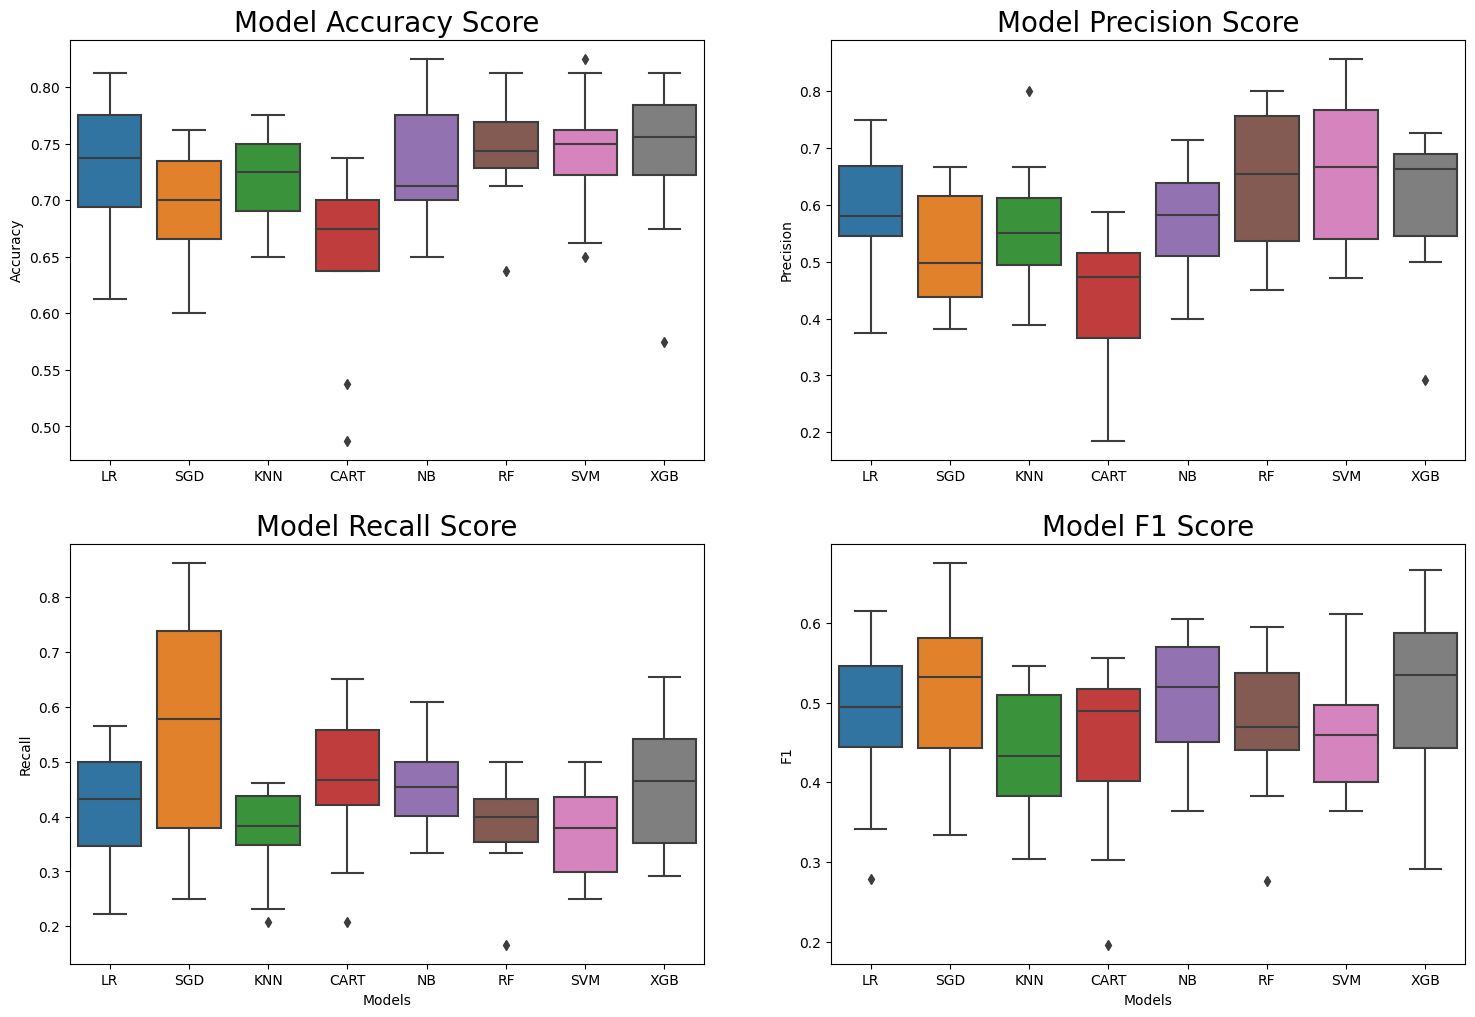

In [610]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
sns.boxplot(data=accuracy_results, ax=ax1)
ax1.set_xticklabels(names)
ax1.set_ylabel("Accuracy")
ax1.set_title("Model Accuracy Score", fontsize=20)

sns.boxplot(data=precision_results, ax=ax2)
ax2.set_ylabel("Precision")
ax2.set_xticklabels(names)
ax2.set_title("Model Precision Score", fontsize=20)

sns.boxplot(data=recall_results, ax=ax3)
ax3.set_ylabel("Recall")
ax3.set_xticklabels(names)
ax3.set_xlabel("Models")
ax3.set_title("Model Recall Score", fontsize=20)

sns.boxplot(data=f1_results, ax=ax4)
ax4.set_ylabel("F1")
ax4.set_xticklabels(names)
ax4.set_xlabel("Models")
ax4.set_title("Model F1 Score", fontsize=20)
plt.show()

In [611]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_clf_model =  SVC(random_state=42) # final model that was selected for case study
final_clf_model.fit(train_data_prepared, y_train) # train the selected model
final_predictions = final_clf_model.predict(test_data_prepared) # create predictions with the test data
final_accuracy_score = accuracy_score(y_test, final_predictions) # find the accuracy score of the model with test data
final_precision_score = precision_score(y_test, final_predictions) # find the precision score of the model with test data
final_recall_score = recall_score(y_test, final_predictions) # find the precision score of the model with test data
final_f1_score = f1_score(y_test, final_predictions) # find the f1 score of the model with test data

final_clf_metrics = {
    "Accuracy": final_accuracy_score,
    "Precision": final_precision_score,
    "Recall": final_recall_score,
    "F1": final_f1_score
}

names = ["SVM"]

final_clf_metrics_df = pd.DataFrame(final_clf_metrics, index=names) # creating data
final_clf_metrics_df.index.name = "Model"

final_clf_metrics_df

,Accuracy,Precision,Recall,F1
Model,,,,
SVM,0.775,0.659091,0.491525,0.563107
